<a href="https://colab.research.google.com/github/Sreeja1585/my-projects/blob/main/Decision_Trees_and_Random_Forests(Task5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import graphviz
from pathlib import Path


In [3]:
df = pd.read_csv("heart.csv")
display(df.head())
print("\nMissing values per column:\n", df.isnull().sum())


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)


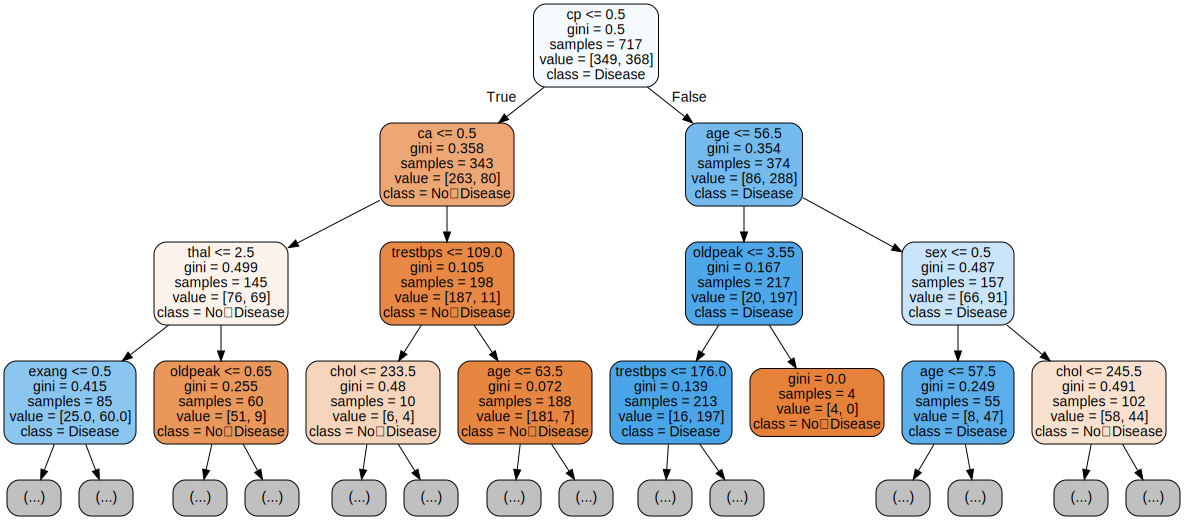

In [6]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dot_file = Path("heart_tree.dot")
export_graphviz(
    dt,
    out_file=str(dot_file),
    feature_names=X.columns,
    class_names=["No‑Disease", "Disease"],
    filled=True, rounded=True, max_depth=3
)
graphviz.Source(dot_file.read_text())

In [7]:

acc_full = accuracy_score(y_test, dt.predict(X_test))

dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=0)
dt_pruned.fit(X_train, y_train)
acc_pruned = accuracy_score(y_test, dt_pruned.predict(X_test))

print(f"Accuracy  |  Full tree:  {acc_full:.3f}")
print(f"Accuracy  |  Pruned tree (depth=4):  {acc_pruned:.3f}")


Accuracy  |  Full tree:  0.981
Accuracy  |  Pruned tree (depth=4):  0.857


In [8]:
rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)
acc_rf = accuracy_score(y_test, rf.predict(X_test))

print(f"Accuracy  |  Random Forest (200 trees):  {acc_rf:.3f}")


Accuracy  |  Random Forest (200 trees):  0.981



Top‑10 Important Features:
cp          0.147907
thalach     0.120571
thal        0.116535
ca          0.105701
oldpeak     0.104711
age         0.089976
chol        0.076150
trestbps    0.075515
exang       0.064504
slope       0.038338
dtype: float64


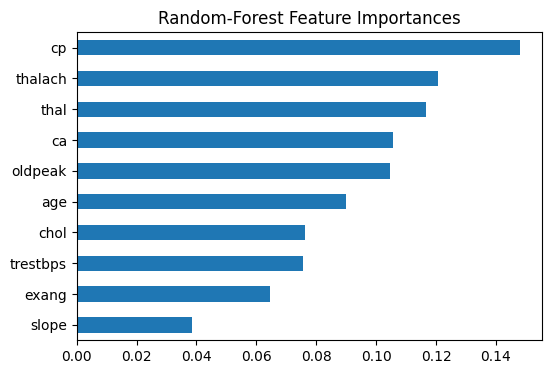

In [9]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
top10 = importances.sort_values(ascending=False).head(10)

print("\nTop‑10 Important Features:")
print(top10)

top10.plot.barh(figsize=(6,4)); plt.gca().invert_yaxis(); plt.title("Random‑Forest Feature Importances"); plt.show()


In [10]:
cv_dt   = cross_val_score(dt_pruned, X, y, cv=5)
cv_rf   = cross_val_score(rf,        X, y, cv=5)

print(f"CV Accuracy | Decision‑Tree (depth=4):  {cv_dt.mean():.3f} ± {cv_dt.std():.3f}")
print(f"CV Accuracy | Random‑Forest:            {cv_rf.mean():.3f} ± {cv_rf.std():.3f}")


CV Accuracy | Decision‑Tree (depth=4):  0.834 ± 0.024
CV Accuracy | Random‑Forest:            0.994 ± 0.007


In [11]:
print("\nClassification Report – Random Forest")
print(classification_report(y_test, rf.predict(X_test), target_names=["No‑Disease","Disease"]))



Classification Report – Random Forest
              precision    recall  f1-score   support

  No‑Disease       0.96      1.00      0.98       150
     Disease       1.00      0.96      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

